<a href="https://colab.research.google.com/github/SubhamMohanty187/Data-Science/blob/main/Projects/Black_Friday_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [455]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [456]:
data = pd.read_csv("/content/train.csv")
df = data.copy()
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


Information about the dataset

In [457]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [458]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


Percentage of Null Values

In [459]:
df.isna().sum()/df.shape[0] * 100   #There are approximately 31% and 69% null values in Product_Category_2 and Product_Category_3 respectively.

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

Now, we have to fill these null values. We choose Median values of these columns to be filled in place of the NaN values.

In [460]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(0).astype('int64')

In [461]:
df['Product_Category_2'].value_counts()

0     173638
8      64088
14     55108
2      49217
16     43255
15     37855
5      26235
4      25677
6      16466
11     14134
17     13320
13     10531
9       5693
12      5528
10      3043
3       2884
18      2770
7        626
Name: Product_Category_2, dtype: int64

In [462]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(0).astype('int64')

In [463]:
df['Product_Category_3'].value_counts()

0     383247
16     32636
15     28013
14     18428
17     16702
5      16658
8      12562
9      11579
12      9246
13      5459
6       4890
18      4629
4       1875
11      1805
10      1726
3        613
Name: Product_Category_3, dtype: int64

Unique Values in each column

In [464]:
df.nunique()   

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

###Since, User_ID and Product_ID act as primary key and have large no. of unique values therfore they do not provide much information in the modelling stage. So, we can drop these columns.

In [465]:
df.drop(['User_ID','Product_ID'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Gender                      550068 non-null  object
 1   Age                         550068 non-null  object
 2   Occupation                  550068 non-null  int64 
 3   City_Category               550068 non-null  object
 4   Stay_In_Current_City_Years  550068 non-null  object
 5   Marital_Status              550068 non-null  int64 
 6   Product_Category_1          550068 non-null  int64 
 7   Product_Category_2          550068 non-null  int64 
 8   Product_Category_3          550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 42.0+ MB


In [466]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [467]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,0,0,8370
1,F,0-17,10,A,2,0,1,6,14,15200
2,F,0-17,10,A,2,0,12,0,0,1422
3,F,0-17,10,A,2,0,12,14,0,1057
4,M,55+,16,C,4+,0,8,0,0,7969


We can see hat in Age and Stay_In_Current_City_Years column have "+" sign in the column values for some datapoints.So, we also have to remove them.(e.g. Look row no. 4)

In [468]:
df['Age'] = df['Age'].str.strip('+')

In [469]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.strip('+').astype('int')

In [470]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,0,0,8370
1,F,0-17,10,A,2,0,1,6,14,15200
2,F,0-17,10,A,2,0,12,0,0,1422
3,F,0-17,10,A,2,0,12,14,0,1057
4,M,55,16,C,4,0,8,0,0,7969


In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Gender                      550068 non-null  object
 1   Age                         550068 non-null  object
 2   Occupation                  550068 non-null  int64 
 3   City_Category               550068 non-null  object
 4   Stay_In_Current_City_Years  550068 non-null  int64 
 5   Marital_Status              550068 non-null  int64 
 6   Product_Category_1          550068 non-null  int64 
 7   Product_Category_2          550068 non-null  int64 
 8   Product_Category_3          550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 42.0+ MB


###Exploratory Data Analysis (EDA)

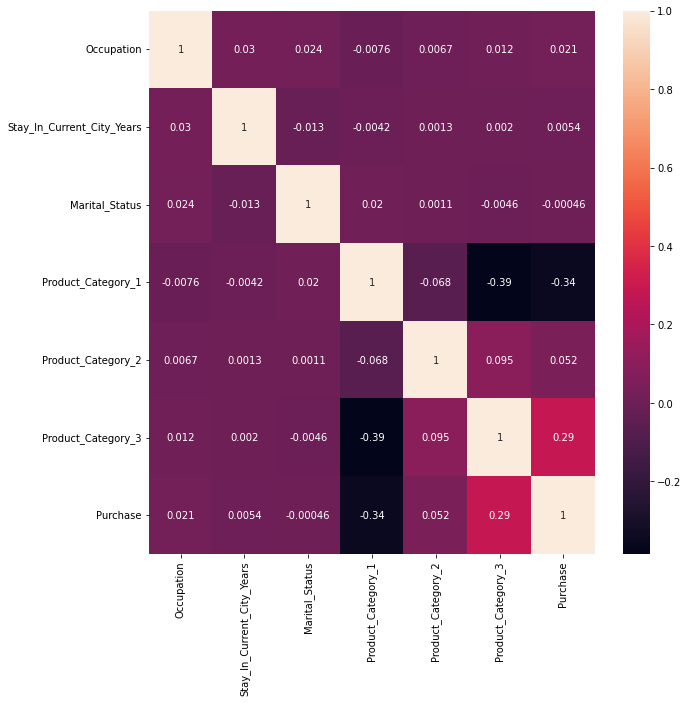

In [472]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

Occupation and Stay_In_City_Years have positive correlation with Purchase.

###Univariate Analysis

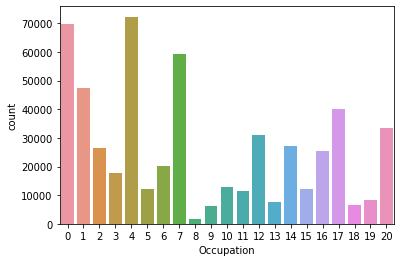

In [473]:
sns.countplot(x=df['Occupation'])

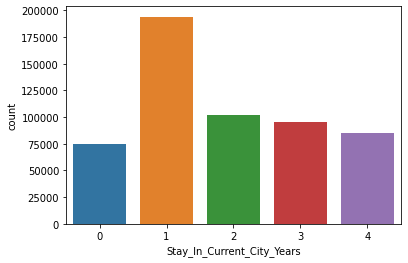

In [474]:
sns.countplot(x=df['Stay_In_Current_City_Years'])

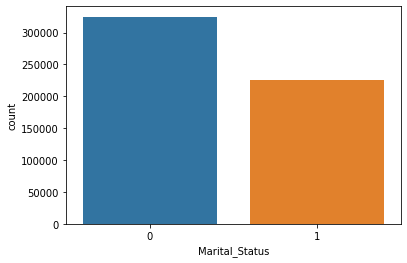

In [475]:
sns.countplot(x=df['Marital_Status'])

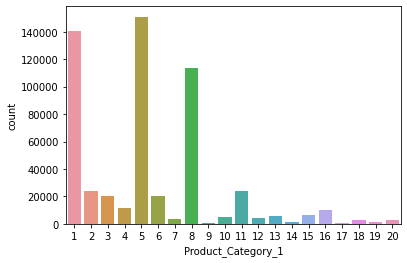

In [476]:
sns.countplot(x=df['Product_Category_1'])

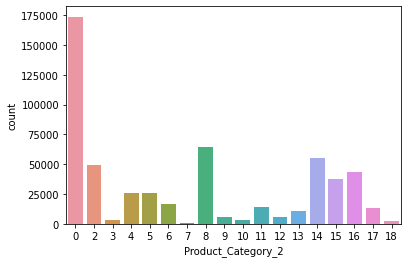

In [477]:
sns.countplot(x=df['Product_Category_2'])

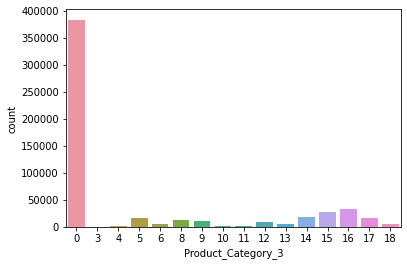

In [478]:
sns.countplot(x=df['Product_Category_3'])

Target Variable Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Purchase Distribution')

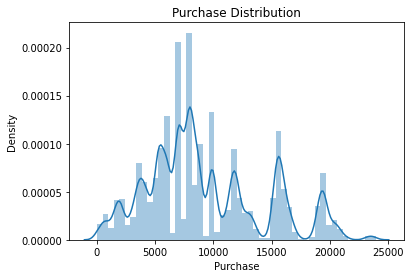

In [479]:
sns.distplot(df['Purchase'])
plt.title("Purchase Distribution")

###Bivariate Analysis

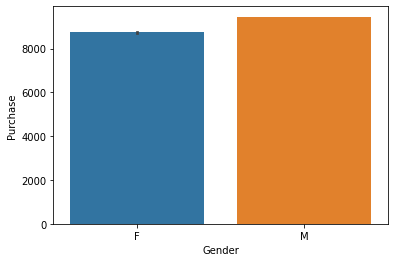

In [480]:
sns.barplot(x=df['Gender'], y=df['Purchase'])

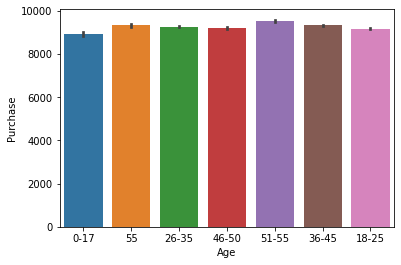

In [481]:
sns.barplot(x=df['Age'], y=df['Purchase'])

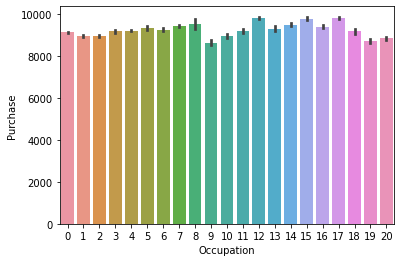

In [482]:
sns.barplot(x=df['Occupation'], y=df['Purchase'])

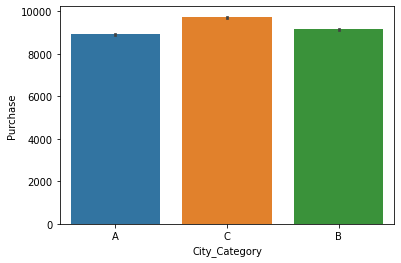

In [483]:
sns.barplot(x=df['City_Category'], y=df['Purchase'])

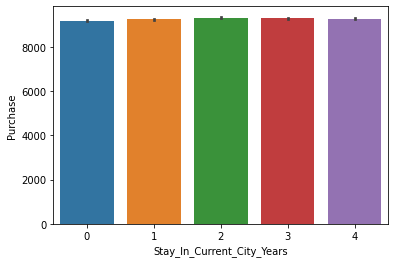

In [484]:
sns.barplot(x=df['Stay_In_Current_City_Years'], y=df['Purchase'])

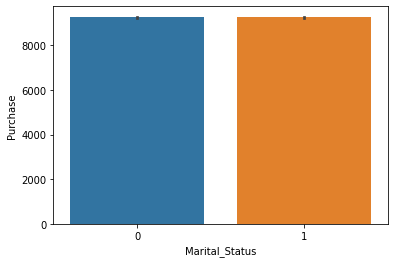

In [485]:
sns.barplot(x=df['Marital_Status'], y=df['Purchase'])

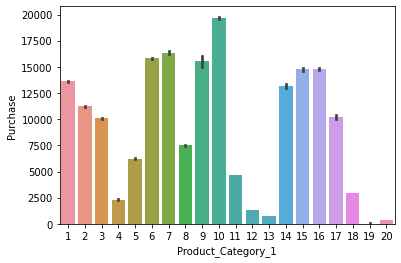

In [486]:
sns.barplot(x=df['Product_Category_1'], y=df['Purchase'])

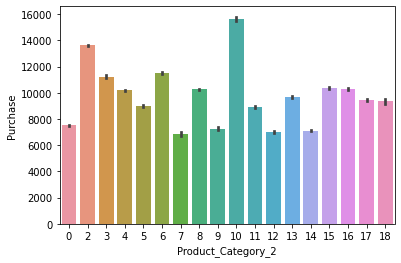

In [487]:
sns.barplot(x=df['Product_Category_2'], y=df['Purchase'])

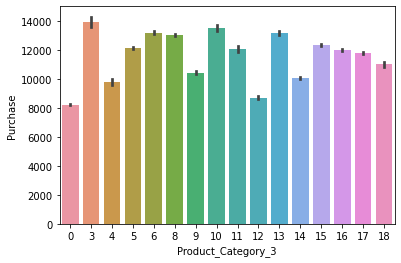

In [488]:
sns.barplot(x=df['Product_Category_3'], y=df['Purchase'])

###Feature Engineering

We have to encode the categorical features.

In [489]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [490]:
df['Gender'] = lr.fit_transform(df['Gender'])

In [491]:
df['Age'] = lr.fit_transform(df['Age'])

In [492]:
df['City_Category'] = lr.fit_transform(df['City_Category'])

In [493]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,0,0,8370
1,0,0,10,0,2,0,1,6,14,15200
2,0,0,10,0,2,0,12,0,0,1422
3,0,0,10,0,2,0,12,14,0,1057
4,1,6,16,2,4,0,8,0,0,7969


Separating the dataset into dependent and independent variables.

In [494]:
X = df.drop(['Purchase'], axis=1)
Y = df['Purchase']

In [495]:
X.shape

(550068, 9)

In [496]:
Y.shape

(550068,)

In [497]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.3)

Now, we have to scale all the features.

In [498]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [499]:
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

###Modeling

In [500]:
RMSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [501]:
from math import sqrt

In [502]:
from sklearn.linear_model import LinearRegression
Algorithm.append('Linear Regressor')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

In [503]:
RMSE_Score.append(sqrt(mean_squared_error(y_test, predicted)))
R2_Score.append(r2_score(y_test, predicted))

In [504]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('DecisionTreeRegressor')
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

In [505]:
RMSE_Score.append(sqrt(mean_squared_error(y_test, predicted)))
R2_Score.append(r2_score(y_test, predicted))

In [506]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('Random Forest Regressor')
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

In [507]:
RMSE_Score.append(sqrt(mean_squared_error(y_test, predicted)))
R2_Score.append(r2_score(y_test, predicted))

In [508]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

[16:26:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [509]:
RMSE_Score.append(sqrt(mean_squared_error(y_test, predicted)))
R2_Score.append(r2_score(y_test, predicted))

In [510]:
score=pd.DataFrame(list(zip(Algorithm,RMSE_Score, R2_Score)),columns =['Algorithm','RMSE_Score', 'R2_Score'])
score.head()

,Algorithm,RMSE_Score,R2_Score
0,Linear Regressor,4624.447118,0.151583
1,DecisionTreeRegressor,3361.334786,0.551757
2,Random Forest Regressor,3051.026480,0.630698
3,XGB Regressor,2982.201385,0.647172


Now we will select the top two models i.e. Random Forest and XGBoost for hyperparamter tuning.

###Hyperparameter Tuning

###Random Forest Tuning

In [511]:
l1=['RMSE_Score','R2_score']#list of parameters for appending
l2=[]    #list for appending metrices of tuned random forest model
l3=[]    #list for appending metrices of tuned XGBoost model

In [512]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [513]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,n_iter = 4, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [514]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=4, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=42, verbose=2)

In [515]:
hp = rf_random.best_estimator_
hp

RandomForestRegressor(bootstrap=False, max_depth=60, max_features='sqrt',
                      min_samples_leaf=4, min_samples_split=10,
                      n_estimators=50)

In [516]:
trf = hp
trf.fit(X_train, y_train)

predictedfinal1 = trf.predict(X_test)

In [517]:
l2.extend([mean_squared_error(y_test, predictedfinal1,squared=False), r2_score(y_test, predictedfinal1)])

In [518]:
l2

[2924.679260184943, 0.6606513108995353]

###XGBoost Hyperparameter Tuning

In [519]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [520]:
reg=xgb.XGBRegressor()
random_search=RandomizedSearchCV(reg,param_distributions=params,n_iter=4,n_jobs=-1,cv=5,verbose=3)

In [521]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[16:47:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_iter=4, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   verbose=3)

In [522]:
hp = random_search.best_estimator_
hp

XGBRegressor(colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=15,
             min_child_weight=3)

In [523]:
txgb = hp
txgb.fit(X_train, y_train)

predictedfinal2 = txgb.predict(X_test)

[16:49:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [524]:
l3.extend([mean_squared_error(y_test, predictedfinal2,squared=False), r2_score(y_test, predictedfinal2)])

In [525]:
l3

[2855.5817899633603, 0.676496567808242]

In [526]:
tuned_model=pd.DataFrame(list(zip(l1, l2, l3)),columns=['Parameters','Tuned_Random_Forest','Tuned_XGBoost'])
tuned_model.transpose()

,0,1
Parameters,RMSE_Score,R2_score
Tuned_Random_Forest,2924.67926,0.660651
Tuned_XGBoost,2855.58179,0.676497


Since, Tuned XGBoost has better result, we choos this as the final model.

In [528]:
final_regressor = txgb

###For Test Data

In [529]:
res=pd.read_csv('/content/test.csv')

In [530]:
res.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [531]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [532]:
res.shape

(233599, 11)

In [533]:
res.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [535]:
res['Product_Category_2'] = res['Product_Category_2'].fillna(0).astype('int64')

In [536]:
res['Product_Category_3'] = res['Product_Category_3'].fillna(0).astype('int64')

In [538]:
res['Age'] = res['Age'].str.strip('+')

In [539]:
res['Stay_In_Current_City_Years'] = res['Stay_In_Current_City_Years'].str.strip('+').astype('int')

In [540]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     233599 non-null  int64 
 1   Product_ID                  233599 non-null  object
 2   Gender                      233599 non-null  object
 3   Age                         233599 non-null  object
 4   Occupation                  233599 non-null  int64 
 5   City_Category               233599 non-null  object
 6   Stay_In_Current_City_Years  233599 non-null  int64 
 7   Marital_Status              233599 non-null  int64 
 8   Product_Category_1          233599 non-null  int64 
 9   Product_Category_2          233599 non-null  int64 
 10  Product_Category_3          233599 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 19.6+ MB


In [541]:
x = res.drop(['User_ID','Product_ID'],axis=1)

In [544]:
lr = LabelEncoder()
x['Gender'] = lr.fit_transform(x['Gender'])
x['Age'] = lr.fit_transform(x['Age'])
x['City_Category'] = lr.fit_transform(x['City_Category'])

In [545]:
x.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1,4,7,1,2,1,1,11,0
1,1,2,17,2,0,0,3,5,0
2,0,3,1,1,4,1,5,14,0
3,0,3,1,1,4,1,4,9,0
4,0,2,1,2,1,0,4,5,12


In [546]:
ss = StandardScaler()
x = ss.fit_transform(x)

In [547]:
y=pd.Series(final_regressor.predict(x),name='Purchase')

In [548]:
final_result=pd.DataFrame(y)

In [549]:
final_result[['Purchase']]

,Purchase
0,14836.004883
1,10355.356445
2,7029.533203
3,2752.207031
4,2848.102539
...,...
233594,7106.016113
233595,6076.744629
233596,12631.400391
233597,18191.798828


In [550]:
final_result['User_ID']=res['User_ID']
final_result['Product_ID']=res['Product_ID']

In [551]:
final_result

,Purchase,User_ID,Product_ID
0,14836.004883,1000004,P00128942
1,10355.356445,1000009,P00113442
2,7029.533203,1000010,P00288442
3,2752.207031,1000010,P00145342
4,2848.102539,1000011,P00053842
...,...,...,...
233594,7106.016113,1006036,P00118942
233595,6076.744629,1006036,P00254642
233596,12631.400391,1006036,P00031842
233597,18191.798828,1006037,P00124742


In [552]:
final_result.to_csv('blackfridayoutput.csv')